# Pandas - Data Analysis with Python


Pandas is a high-performance, easy-to-use data structures and data analysis tools.

<img src="images/pandas.jpg" style="width: 500px;"/>

## What is it good for?

Working with (large) data sets and created automated data processes.

Pandas is extensively used to prepare data in data science (machine learning, data analytics, ...)

**Examples**: 
* **Import and export** data into standard formats (CSV, Excel, Latex, ..).
* Combine with Numpy for **advanced computations** or Matplotlib for **visualisations**.
* Calculate **statistics** and answer questions about the data, like
  * What's the average, median, max, or min of each column?
  * Does column A correlate with column B?
  * What does the distribution of data in column C look like?
* **Clean** up data (e.g. fill out missing information and fix inconsistent formatting) and **merge** multiple data sets into one common dataset.



## Some interesting data sources

### (Norsk) Statistisk sentralbyrå
https://www.ssb.no

Employment rates, immigration rates housing market, ...

<img src="images/ssb.png" style="width: 400px;"/>

### Finn API 
https://www.finn.no/api

Note: Unfortunately currently only open for business



### Oslo Bysykkel API
https://developer.oslobysykkel.no

Live usage data and statistics.

**!! This lecture will use this data.**

### Ruter API 
https://developer.entur.org

Travel planning and live departure information. For example live departure information 


<img src="images/raspberry_pi_project.jpg" style="width: 300px;"/>

(Credits: Malte Pliszewski)

### YR data
http://om.yr.no/verdata/free-weather-data/

### Financial and economic data
https://www.quandl.com/

### And lots lots more:

* Almost every "smart" device, internet of things, ...

## More information

* Official Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Pandas cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html
* Wes McKinney, Python for Data Analysis 
![Python for Data Analysis](images/python_for_data_analysis.gif "Python for Data Analysis")

## Installation

* If you have Anaconda: Already installed
* If you have Miniconda: 
      conda install pandas
* If you have your another Python distribution: 
      python3 -m pip install pandas

## Quick guide through Pandas


In [1]:
%matplotlib inline

First import pandas (and numpy) as usual.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The basic data structures of Pandas

<center>
<img src="https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png
" style="width: 500px;"/>

    Figure: Fundamental data types in Pandas.
    (Image source: https://www.learndatasci.com)
</center>

### Series 

Series in Pands are 1-dimensional, axis-labeled array capable of holding any data type.

The simplest way to create a Series is from a list:

In [3]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8])
s1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

* Pandas relies on numpy to store the underlying data. Note the dtype property that we already know from numpy. 
* If no dtype is specified, it chooses a stuitable dtype for your data. 

## Specifying the axis label

By default, the data is labeld by integers. This can be changed with:

In [4]:
s2 = pd.Series([1, 3, 5, np.nan, 6, 8], index=["a", "a", "c", "d", "e", "f"])
s2

a    1.0
a    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

# Time-series data

A common use-case is to have data labeled with time stamps (for instance sensor data).



In [5]:
dates = pd.date_range(start='20181023', end='20191023', periods=6)
dates

DatetimeIndex(['2018-10-23', '2019-01-04', '2019-03-18', '2019-05-30',
               '2019-08-11', '2019-10-23'],
              dtype='datetime64[ns]', freq=None)

In [6]:
s3 = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s3

2018-10-23    1.0
2019-01-04    3.0
2019-03-18    5.0
2019-05-30    NaN
2019-08-11    6.0
2019-10-23    8.0
dtype: float64

# DataFrame

DataFrame's are 2-dimensional labeled data structure with columns of potentially different types.

The most basic method to create a DataFrame is from a dictionary:

In [7]:
data = {
    'apples': [3, 0, 0, 1],
    'pears':  [6, 1, 3, 5]
}

purchases = pd.DataFrame(data)
purchases

,apples,pears
0,3,6
1,0,1
2,0,3
3,1,5


**How did this work:** Each (key, value) pair in the dictionary is interpreted as a column in the data table. The key is used as column label.

As with Series, we can provide an index to label the y-axis:

In [8]:
data = {
    'apples': [3, 0, 0, 1],
    'pears':  [6, 1, 3, 2]
}
customers = ["Marie", "Jørgen", "Hilde", "Hans"]

purchases = pd.DataFrame(data, index=customers)
purchases

,apples,pears
Marie,3,6
Jørgen,0,1
Hilde,0,3
Hans,1,2


## Extracting columns from a DataTable

When **loc**ating (i.e. extracting) a column of a DataFrame, one obtains a `Series`

In [9]:
purchases.loc["Hans"]

apples    1
pears     2
Name: Hans, dtype: int64

In [10]:
type(purchases.loc["Hans"])

pandas.core.series.Series

## Combining two Series to a DataFrame 

In [11]:
s1 = pd.Series([1, 2], index=['A', 'B'])
s2 = pd.Series([3, 4], index=['A', 'C'])
pd.concat([s1, s2, s1], axis=1, sort=False)

,0,1,2
A,1.0,3.0,1.0
B,2.0,NaN,2.0
C,NaN,4.0,NaN


## Loading data from file

For pratical applications, we will read the data from a file rather from a dictionary. 

Pandas offers various drivers to load data in different formats:

In [12]:
pd.read_*?

pd.read_clipboard
pd.read_csv
pd.read_excel
pd.read_feather
pd.read_fwf
pd.read_gbq
pd.read_hdf
pd.read_html
pd.read_json
pd.read_orc
pd.read_parquet
pd.read_pickle
pd.read_sas
pd.read_spss
pd.read_sql
pd.read_sql_query
pd.read_sql_table
pd.read_stata
pd.read_table

We will see this in a real application in a moment.

# Data analysis on the Oslo Byskkel data 



<img src="https://cdn.sanity.io/images/23ukf9xm/production/4acf4a351c2174972b61465210f56878c41bad65-5698x3799.jpg?w=1200&h=600&fit=max" style="width: 500px;"/>



**Goal**: Perfrom data analysis of the bike usage, such as:
* Identify peak and low points of biek station usage (over a year, week or day)?
* Which are the most and least used bike stations?
* Which are the most and least used bike routes?
* Visualize the bike usage in Oslo.

## Step 1: Data aquisition and inspection

The monthly usage data can be downloaded here: https://developer.oslobysykkel.no/data. 


I downloaded the data from August to September 2016:

In [13]:
!ls -hl data/bysykkel/*.csv

-rw-r--r--  1 minrk  staff    14M Aug 19 12:14 data/bysykkel/trips-2016.10.1-2016.10.31.csv
-rw-r--r--  1 minrk  staff    21M Aug 19 12:14 data/bysykkel/trips-2016.8.1-2016.8.31.csv
-rw-r--r--  1 minrk  staff    22M Aug 19 12:14 data/bysykkel/trips-2016.9.1-2016.9.30.csv


Let's inspect the content of one of these files:

In [14]:
!wc data/bysykkel/trips-2016.10.1-2016.10.31.csv

  242759 1213795 14565493 data/bysykkel/trips-2016.10.1-2016.10.31.csv


## Loading the data into a DataFrame

Since this is a comma seperated file, we can use Panda's `read_csv` function:

In [15]:
trips = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', 
                    sep=',')

The result is stored in  a `DataFrame` object. The first row of the csv was used as column labels.

In [16]:
trips

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200
...,...,...,...,...
242753,284,2016-10-31 23:53:30 +0100,164.0,2016-11-01 00:04:13 +0100
242754,218,2016-10-31 23:53:48 +0100,292.0,2016-11-01 00:09:17 +0100
242755,204,2016-10-31 23:54:28 +0100,277.0,2016-11-01 00:01:59 +0100
242756,204,2016-10-31 23:56:57 +0100,201.0,2016-11-01 00:02:16 +0100


We can use the `head` and `tail` functions to only show the (by default 5) top rows in the data table.

In [17]:
trips.head(5)

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200


## Fixing columns types

Pandas tries to **automatically detect the type** of a column:

In [18]:
trips.dtypes

Start station      int64
Start time        object
End station      float64
End time          object
dtype: object

We can see that this **automatic detection failed** for:

* `Start time`:  should be a date
* `End time`:  should be a date
* `End station`:  should be a integer

## Fixing  start and end times

In order to be able to sort or filter by date, we need to tell Pandas that this column should be parsed as dates. We can do this directly when loading in the data: 

In [19]:
trips = pd.read_csv(
    "data/bysykkel/trips-2016.10.1-2016.10.31.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
)

**Note!**  The lambda function is necessary to read dates with mixed time-zones!

In [20]:
trips.dtypes

Start station                  int64
Start time       datetime64[ns, UTC]
End station                  float64
End time         datetime64[ns, UTC]
dtype: object

In [21]:
trips.head()

,Start station,Start time,End station,End time
0,283,2016-10-01 04:00:08+00:00,238.0,2016-10-01 04:09:47+00:00
1,169,2016-10-01 04:00:41+00:00,175.0,2016-10-01 04:11:07+00:00
2,211,2016-10-01 04:01:02+00:00,162.0,2016-10-01 04:15:52+00:00
3,200,2016-10-01 04:01:20+00:00,163.0,2016-10-01 04:15:04+00:00
4,157,2016-10-01 04:02:16+00:00,163.0,2016-10-01 04:04:29+00:00


### Fixing end station

We expected `End station` to be of type `np.int64`. We can enforce this with:

In [22]:
trips = pd.read_csv(
    "data/bysykkel/trips-2016.10.1-2016.10.31.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
    dtype={"End station": np.int64},
)

ValueError: Integer column has NA values in column 2

**Conclusion**: 
`End station` contains `Not a Number` values or`NaN` values, which can be represented in the `float` datatype, but not in the `int` datatype

In [23]:
trips.sort_values("End station").tail(100)

,Start station,Start time,End station,End time
174509,182,2016-10-21 12:53:05+00:00,309.0,2016-10-21 13:50:30+00:00
211908,215,2016-10-27 09:18:41+00:00,309.0,2016-10-27 09:32:19+00:00
111557,162,2016-10-13 10:31:14+00:00,309.0,2016-10-13 10:38:54+00:00
105880,162,2016-10-12 16:08:20+00:00,309.0,2016-10-12 16:20:24+00:00
234911,267,2016-10-30 14:44:27+00:00,309.0,2016-10-30 14:59:58+00:00
...,...,...,...,...
107496,233,2016-10-12 19:05:32+00:00,NaN,2016-10-17 05:56:12+00:00
117359,267,2016-10-13 20:55:38+00:00,NaN,2016-10-14 09:43:21+00:00
153782,232,2016-10-19 06:08:40+00:00,NaN,2016-10-20 05:42:02+00:00
200309,158,2016-10-25 17:22:32+00:00,NaN,2016-10-25 18:02:16+00:00


But we *can* do this if we discard the rows with missing data. Pandas has various utilities for dealing with missing data

In [24]:
trips = trips_oct = trips.dropna(subset=["End station"]).astype({"End station": int})
trips.tail(5)

,Start station,Start time,End station,End time
242753,284,2016-10-31 22:53:30+00:00,164,2016-10-31 23:04:13+00:00
242754,218,2016-10-31 22:53:48+00:00,292,2016-10-31 23:09:17+00:00
242755,204,2016-10-31 22:54:28+00:00,277,2016-10-31 23:01:59+00:00
242756,204,2016-10-31 22:56:57+00:00,201,2016-10-31 23:02:16+00:00
242757,268,2016-10-31 22:59:10+00:00,299,2016-10-31 23:04:55+00:00


# Selecting data from dataframes

## Selecting columns


There are three main ways to select columns from a DataTable:

* indexing notation [].
* The .loc accessor
* The .iloc accessor

## Selecting columns with the index notation

Use the index notation if you know the name of the column(s) that you want to extract.

If you use a single column, the result is a Series:

In [ ]:
trips["Start time"].head()

## Selecting multiple columns

Multiple columns are selected by indexing with a list of column titles. The result is a DataFrame:

In [ ]:
trips[["Start time", "End time"]].head()

### Selecting rows and columns 

`loc`  a more explicit alternative for selecting rows and/or columns

**Syntax**: `DataFrame.loc[ROWS, COLUMNS]`

In [ ]:
trips.loc[[1, 4, 5], ["Start time", "End time"]]

Use the : notation to select ranges of columns/rows.

### Selecting rows and columns based on indices

`iloc` is the same is `loc` but expectes the index positions instead of column names (i.e. always uses intergers)

**Syntax**: `DataFrame.iloc[ROWS, COLUMNS]`

In [ ]:
trips.iloc[:5, 0:2]

## Selecting based on values in columns

Comparisons on a series produce a new series of booleans.
This can be used to construct a "mask" of values that can be passed
to loc or index-access:

In [ ]:
trips["Start station"] == 283

In [ ]:
(trips["Start station"] == 283).sum()

In [ ]:
trips[trips["Start station"] == 283]

We can even do complex arithmetic on columns

In [ ]:
durations = trips["End time"] - trips["Start time"]
durations

In [ ]:
durations.quantile(0.9)

Anything that results in a boolean Series with the same index as a dataframe or series
can be used to select a subset of data.

This example says: give us the top 10% (above 90th percential) of trips by duration

In [ ]:
trips[durations >= durations.quantile(0.9)]

Or specify a value. Pandas has lots of *very* useful convenience functions
for comparing dates. You can often specify a string which pandas will interpret

In [ ]:
trips[durations >= "1 day"]

## Special handling of strings and datetime

Series with datetime data or strings have special accessor methods for working with that kind of data
by accessing a `.dt` or `.str` attribute, giving access to 

In [ ]:
trips["Start time"].dt.weekday

Boolean series can be combined using Python's bitwise or (`|`) and bitwise and (`&`) operators.
So we can find late-night trips, i.e. those that start between 22:00 and 04:00

In [ ]:
trips[(trips["Start time"].dt.hour >= 22) | (trips["Start time"].dt.hour <= 3)]

## GroupBy

grouping is like creating a dictionary of dataframes for subsets of your data.
You can group by any kind of value.
The result is like a dictionary of data frames,
where each one contains a subset of data matching some criterion.

You can pass groupby one or more column names to group by unique values on that column

In [ ]:
trips.groupby("Start station")

groupby can be expensive, so it delays actual operations as late as possible

In [ ]:
trips.groupby("Start station")["End station"]

Metrics such as `count`, `unique`, `value_counts` etc. result in actual evaluation

In [ ]:
trips.groupby("Start station")["End station"].count()

`.value_counts()` creates a Series, so we have a two-level index:

In [ ]:
trips.groupby("Start station")["End station"].value_counts()

In [ ]:
trips.groupby("Start station")["End station"].value_counts()[157]

We can use groupby to count the number of tripts that start on each weekday:

In [ ]:
trips.groupby(trips["Start time"].dt.weekday).count()

In [ ]:
trips.groupby(trips["Start time"].dt.weekday)["Start station"].count()

In [ ]:
by_day = trips.groupby(trips["Start time"].dt.weekday)
grouped = trips.groupby([trips["Start time"].dt.weekday, trips["Start time"].dt.day == trips["End time"].dt.day])
print((grouped.count() / by_day.count())["Start station"].to_string(float_format="{:,.2%}".format))

In [ ]:
by_day = trips.groupby(trips["Start time"].dt.weekday)
by_day.count()

In [ ]:
grouped = trips.groupby([trips["Start time"].dt.weekday, trips["Start time"].dt.day == trips["End time"].dt.day])
grouped.count()

In [ ]:
s = (grouped.count() / by_day.count())["Start station"]
s

In [ ]:
print(s.to_string(float_format="{:,.2%}".format))

## Visualisation

We can use the `plot` class method to plot our data table:

In [ ]:
trips['Start time'].plot();


By default, the DataFrame index is used to label the x-axis.

## Plotting multiple columns 

Passing multiple columns results in multiple plot lines

In [ ]:
trips[['Start time', 'End time']].head(100).plot();

In order to get a more meaningful x-axis, we can select a column to be used as the x-axis:

In [ ]:
trips.head(5000).plot.scatter(
    x="Start station", y=["End station"], c="Start time", cmap="viridis"
);

## Bar plots

The documentation of plot reveils many more plotting options:

In [ ]:
trips.plot?

For example, let's create a bar plot:

In [ ]:
trips.head(10).plot(x='Start time', y=['Start station', 'End station'], kind='bar');

## Histograms

In [ ]:
trips['Start station'].plot(kind='hist');

In [ ]:
trips['Start time'].dt.hour.plot(kind='hist', bins=range(25));

In [ ]:
trips['Start time'].dt.weekday.plot.hist(bins=range(8));

'unstack' takes a two-level index and promotes one level to column names

In [ ]:
grouped.count()["Start station"].unstack(1)

In [ ]:
import calendar
import matplotlib.pyplot as plt

In [ ]:
grouped.count()["Start station"].unstack(1).plot(kind="bar", stacked=True)
plt.xlabel("Weekday");
plt.xticks(range(7), calendar.day_name);

In [ ]:
(grouped.count() / by_day.count())["Start station"].unstack(1)[False].plot.bar()
plt.xlabel("Weekday");
plt.xticks(range(7), calendar.day_name);

## Saving data 

DataFrames can be saved to various formats. 

For exporting to a spreadsheet compatible format (e.g. Excel), you can export as CSV file: 

In [25]:
data = trips[['Start station', 'End station']].head(10)

with open("start_stop_stations.csv", "w") as file:
    csv =  data.to_csv()
    print(csv)
    file.write(csv)

,Start station,End station
0,283,238
1,169,175
2,211,162
3,200,163
4,157,163
5,177,179
6,257,199
7,191,191
8,191,167
9,181,251



## Usefull trick for your bachelor/master thesis

**Goal**: If you do data analyis as part of your research, it is usefull to generate any figures/tables directly from your analytics scripts. 

**Solution**: Pandas can automatically generate Latex tables: 

In [26]:
with open('table.tex', 'w') as file:
    latex = data.to_latex()
    print(latex)
    file.write(latex)


\begin{tabular}{lrr}
\toprule
{} &  Start station &  End station \\
\midrule
0 &            283 &          238 \\
1 &            169 &          175 \\
2 &            211 &          162 \\
3 &            200 &          163 \\
4 &            157 &          163 \\
5 &            177 &          179 \\
6 &            257 &          199 \\
7 &            191 &          191 \\
8 &            191 &          167 \\
9 &            181 &          251 \\
\bottomrule
\end{tabular}



## Simple data analytics: What are the most used bike stations?

**Approach**: For each bike station usage, the station's `id` occurs in a new row in the `Start station` column. 
In order to find how often a bike station is used, we count how often the station id occurs in the `Start station` column. By sorting these counds from high to low, we get the most used bike stations. 

The function `value_counts` does exactly what we need:

In [27]:
trips['Start station'].value_counts()[10:]   

229    3771
210    3586
262    3568
164    3428
287    3289
       ... 
249     270
308     257
307     256
188     256
256     153
Name: Start station, Length: 121, dtype: int64

Let's plot the result in the bar chart:

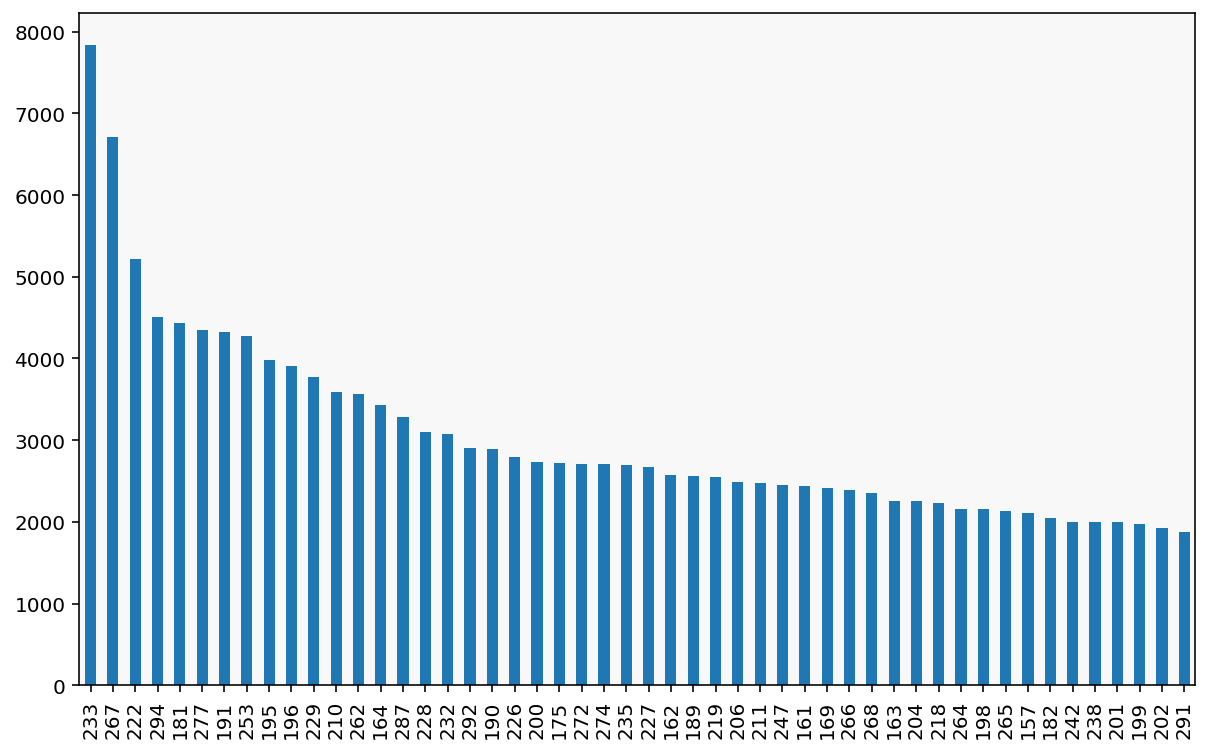

In [29]:
trips['Start station'].value_counts()[:50].plot(kind='bar');
plt.grid(False);

## Concatenating DataFrames 1/2

The data so far only contained the statistics for October 2016:

In [30]:
trips_oct["Start time"].min(), trips_oct["Start time"].max()

(Timestamp('2016-10-01 04:00:08+0000', tz='UTC'),
 Timestamp('2016-10-31 22:59:10+0000', tz='UTC'))

Let us load the data for September 2016:

In [31]:
trips_sep = pd.read_csv(
    "data/bysykkel/trips-2016.9.1-2016.9.30.csv",
    sep=",",
    parse_dates=["Start time", "End time"],
    date_parser=lambda col: pd.to_datetime(col, utc=True),
)
# perform transform to ensure we have integer stations
trips_sep = trips_sep.dropna().astype({"End station": int})

## Concatenating DataFrames 2/2

To concatenate the two, we use the `concat` function:

In [32]:
trips = pd.concat([trips_sep, trips_oct]).reset_index()

Let's check that we indeed have the full range:

In [33]:
trips["Start time"].min(), trips["Start time"].max()

(Timestamp('2016-09-01 04:00:02+0000', tz='UTC'),
 Timestamp('2016-10-31 22:59:10+0000', tz='UTC'))

In [34]:
len(trips_sep), len(trips_oct), len(trips)

(377649, 242747, 620396)

# Linking multiple tables

**Problem**: At the moment, the bike stations are anonymous ids. It would be usefull to have additional meta-data (location name, GPS coordinates, ...) attached. 

Luckily we have a file that contains this information:

In [35]:
import json
with open("data/bysykkel/stations.json") as f:
    station_info = json.load(f)
station_info["stations"][:2]

[{'id': 157,
  'in_service': True,
  'title': 'Nylandsveien',
  'subtitle': 'mellom Norbygata og Urtegata',
  'number_of_locks': 30,
  'center': {'latitude': 59.91562, 'longitude': 10.762248},
  'bounds': [{'latitude': 59.915418602160436, 'longitude': 10.762068629264832},
   {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
   {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
   {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
   {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}]},
 {'id': 158,
  'in_service': True,
  'title': 'Bentsebrugata',
  'subtitle': 'rett over busstoppet',
  'number_of_locks': 24,
  'center': {'latitude': 59.939228, 'longitude': 10.75917},
  'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longit

## Reading the station information 1/3

The obvious thing would be to use `pd.read_json`:

In [36]:
bike_stations = pd.read_json('data/bysykkel/stations')

ValueError: Expected object or value

Does not work because `read_json` expects the json to have a specific structure.

## Reading the station information 2/3

Instead we load the data with the `json` module:

In [37]:
import json
with open('data/bysykkel/stations.json', 'r') as f:
    stations_json = json.load(f)
print(stations_json.keys())


dict_keys(['stations'])


We are interested in the node `stations`, so let's extract this:

In [38]:
station_json = stations_json['stations']
print(len(station_json))
station_json[:2]

130


[{'id': 157,
  'in_service': True,
  'title': 'Nylandsveien',
  'subtitle': 'mellom Norbygata og Urtegata',
  'number_of_locks': 30,
  'center': {'latitude': 59.91562, 'longitude': 10.762248},
  'bounds': [{'latitude': 59.915418602160436, 'longitude': 10.762068629264832},
   {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
   {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
   {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
   {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}]},
 {'id': 158,
  'in_service': True,
  'title': 'Bentsebrugata',
  'subtitle': 'rett over busstoppet',
  'number_of_locks': 24,
  'center': {'latitude': 59.939228, 'longitude': 10.75917},
  'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longit

### Reading in station infromation 3/3

We can now use the `pandas.json_normalize` function to read in the entire dataset:

In [39]:
stations = pd.json_normalize(station_json)
stations

,id,in_service,title,subtitle,number_of_locks,bounds,center.latitude,center.longitude
0,157,True,Nylandsveien,mellom Norbygata og Urtegata,30,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248
1,158,True,Bentsebrugata,rett over busstoppet,24,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170
2,159,True,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,21,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279
3,160,True,Sjøsiden vest,nærmest fontenen,25,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687
4,161,True,St. Hanshaugen park vest,ved busstoppet Colletts gate,20,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456
...,...,...,...,...,...,...,...,...
125,305,True,Georg Morgenstiernes hus,ved Moltke Moes vei,45,"[{'latitude': 59.938893893998106, 'longitude':...",59.938998,10.723075
126,306,True,Møllergata,rett over Youngstorget,30,"[{'latitude': 59.91530028312405, 'longitude': ...",59.915290,10.748453
127,307,True,Bak Niels Treschows hus sør,nærmest trikkestoppet,42,"[{'latitude': 59.94238164705898, 'longitude': ...",59.942525,10.723352
128,308,True,Blindern studentparkering,rett ved Blindern Studenterhjem,42,"[{'latitude': 59.9409978752237, 'longitude': 1...",59.940930,10.720666


## Setting the index

Before extracting data from the `DataFrame`, it is good practice to assign a column with unique values as the index of the dataframe (if possible). For the stations DataFrame, the `id` column is a natural choice:

In [40]:
stations = stations.set_index('id')
stations

,in_service,title,subtitle,number_of_locks,bounds,center.latitude,center.longitude
id,,,,,,,
157,True,Nylandsveien,mellom Norbygata og Urtegata,30,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248
158,True,Bentsebrugata,rett over busstoppet,24,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170
159,True,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,21,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279
160,True,Sjøsiden vest,nærmest fontenen,25,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687
161,True,St. Hanshaugen park vest,ved busstoppet Colletts gate,20,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456
...,...,...,...,...,...,...,...
305,True,Georg Morgenstiernes hus,ved Moltke Moes vei,45,"[{'latitude': 59.938893893998106, 'longitude':...",59.938998,10.723075
306,True,Møllergata,rett over Youngstorget,30,"[{'latitude': 59.91530028312405, 'longitude': ...",59.915290,10.748453
307,True,Bak Niels Treschows hus sør,nærmest trikkestoppet,42,"[{'latitude': 59.94238164705898, 'longitude': ...",59.942525,10.723352


The index will be used, e.g. for row labels when plotting:

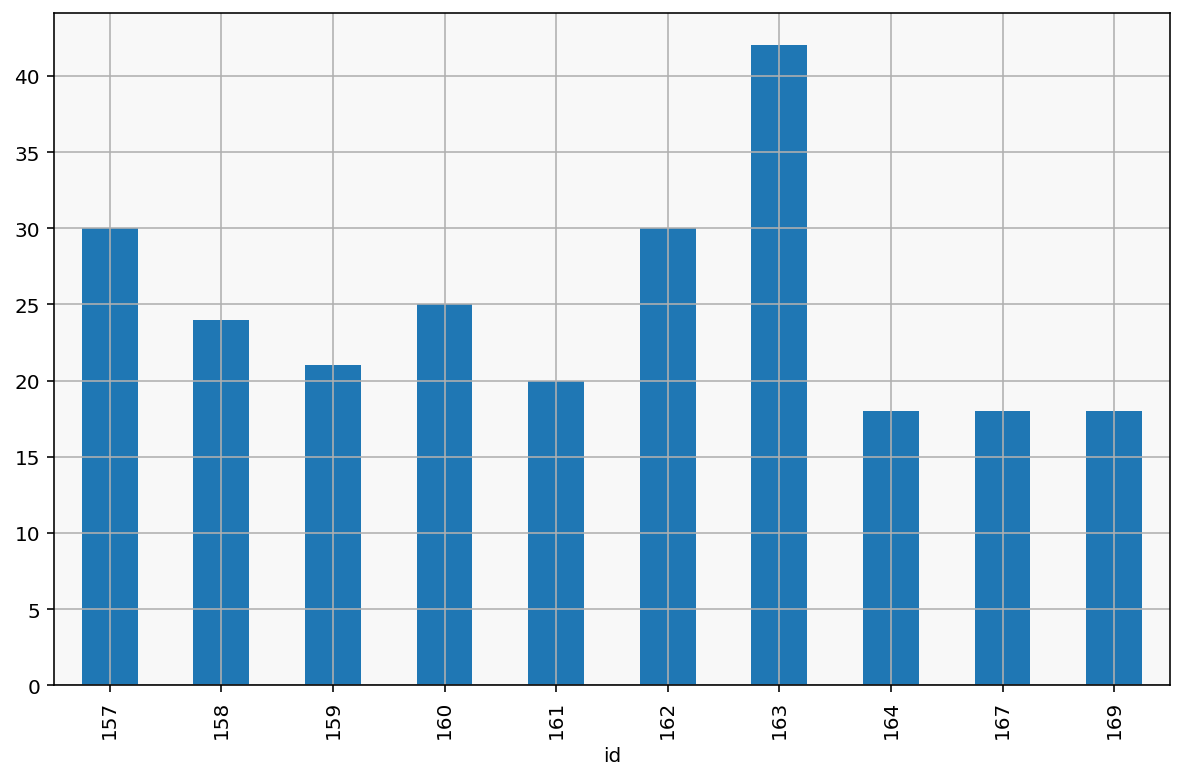

In [41]:
stations.head(10)["number_of_locks"].plot(kind="bar");

### Removing columns from DataFrames

Some of the columns are not usefull. We can remove columns from a DataFrame with:
```python
Dataframe.drop([Column Name or list], axis=1)
```
Lets reduce our stations to the usefull columns:

In [42]:
stations = stations.drop(["bounds", "subtitle"], axis=1)   # axis=0 drops rows
stations.head()

,in_service,title,number_of_locks,center.latitude,center.longitude
id,,,,,
157,True,Nylandsveien,30,59.915620,10.762248
158,True,Bentsebrugata,24,59.939228,10.759170
159,True,Hans Nielsen Hauges plass,21,59.939238,10.774279
160,True,Sjøsiden vest,25,59.910215,10.751687
161,True,St. Hanshaugen park vest,20,59.926872,10.738456


**Alternative**: Use `.loc` to select a subset of a DataFrame
```python
DataFrame.loc[startrow:endrow,startcolumn:endcolumn]
```

## Adding computed columns

Sometimes it is usefull to add a new column based on calculations. 

**Syntax**:
```python
Dataframe.apply(function, axis=1)  # Results in a Series
``` 

**Example**: Add a column with the distance from the station to Oslo center. 

First we compute a Series with the distance values:

In [43]:
from numpy import cos, arcsin, sqrt, pi

oslo_center = 59.9127, 10.7461 # oslo center latitude, longitude

def distance_to_oslo_center(row):
    """ Computes the distance of a lat/lon"""

    lat_station = row["center.latitude"]
    lon_station = row["center.longitude"]

    lat_sentrum, lon_sentrum = oslo_center

    degrees = pi / 180  # convert degrees to radians
    a = (
        0.5
        - (cos((lat_sentrum - lat_station) * degrees) / 2)
        + (
            cos(lat_sentrum * degrees)
            * cos(lat_station * degrees)
            * (1 - cos((lon_station - lon_sentrum) * degrees))
            / 2
        )
    )
    return 12742 * arcsin(sqrt(a))  # 2 * R * asin...


distance = stations.apply(distance_to_oslo_center, axis=1)
distance

id
157    0.956887
158    3.038354
159    3.342640
160    0.416360
161    1.632424
         ...   
305    3.193283
306    0.316456
307    3.550350
308    3.444120
309    3.580368
Length: 130, dtype: float64

Then we add that serie to the DataFrame:

In [44]:
stations["distance_to_oslo_center"] = distance
stations 

,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
id,,,,,,
157,True,Nylandsveien,30,59.915620,10.762248,0.956887
158,True,Bentsebrugata,24,59.939228,10.759170,3.038354
159,True,Hans Nielsen Hauges plass,21,59.939238,10.774279,3.342640
160,True,Sjøsiden vest,25,59.910215,10.751687,0.416360
161,True,St. Hanshaugen park vest,20,59.926872,10.738456,1.632424
...,...,...,...,...,...,...
305,True,Georg Morgenstiernes hus,45,59.938998,10.723075,3.193283
306,True,Møllergata,30,59.915290,10.748453,0.316456
307,True,Bak Niels Treschows hus sør,42,59.942525,10.723352,3.550350


### Min, max mean of Series data:

We can use mathematical functions such as `min`, `max` or `mean` to get statistical information about a column:

Minimum number of locks:

In [45]:
stations["number_of_locks"].min()

6

Maximum number of locks:

In [46]:
stations["number_of_locks"].max()

48

Average number of locks:

In [47]:
stations["number_of_locks"].mean()

22.29230769230769

## Plotting maps

It would be nice to plot the stations on a map.

In [52]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, basemaps, basemap_to_tiles

oslo_map = Map(
    center=oslo_center,
    zoom=13,
)


def add_marker(row):
    center = row["center.latitude"], row["center.longitude"]
    m = Marker(
        location=center,
        title=f"{row.name} {row['title']}",
    )

    oslo_map.add_layer(m)
    m.popup = HTML(f"{m.title}<br/>{row.distance_to_oslo_center:.2f} km to center")


stations.apply(add_marker, axis=1)
oslo_map

Map(center=[59.9127, 10.7461], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

# Merging Panda objects

So far our bike statistics stores the bike stations as integers:


In [ ]:
trips.head()

Wouldn't it be nice to add the station information? 

We achieve this by merging the information in the `stations` DataFrame into the `trips_sep_oct` DataFrame. The syntax for merging two tables with the most important arguments is:

```python
pd.merge(left, right, how='inner', left_on=None, right_on=None)
```         
The arguments mean the following:
* `left`: A DataFrame object
* `right`: Another DataFrame object
* `left_on`: Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `right_on`: Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `how`: One of 'left', 'right', 'outer', 'inner'. Defaults to inner. See below for more detailed description of each method:


###  A simple demo on merging

In [29]:
purchases = pd.DataFrame({"product": ["apples", "oranges"], "purchases": [1, 3]})
purchases

,product,purchases
0,apples,1
1,oranges,3


In [30]:
prices = pd.DataFrame({"product": ["apples", "pears"], "price": [5.5, 1.2]})
prices

,product,price
0,apples,5.5
1,pears,1.2


In [31]:
pd.merge(purchases, prices, how="right", left_on="product", right_on="product")

,product,purchases,price
0,apples,1.0,5.5
1,pears,NaN,1.2


### Back to the Oslo Bysykkel example

Let's try it out. First, lets check the names of our columns again:

In [32]:
print(trips.dtypes)

index                          int64
Start station                  int64
Start time       datetime64[ns, UTC]
End station                    int64
End time         datetime64[ns, UTC]
dtype: object


In [33]:
print(stations.dtypes)

in_service                    bool
title                       object
number_of_locks              int64
center.latitude            float64
center.longitude           float64
distance_to_oslo_center    float64
dtype: object


We want to merge in the columns `trips["Start station"]` with the index for `stations`. We merge call is therefore:

In [34]:
merged_bike_stats = pd.merge(
    trips, stations, how="left", left_on="Start station", right_index=True
)
merged_bike_stats

,index,Start station,Start time,End station,End time,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
0,0,291,2016-09-01 04:00:02+00:00,301,2016-09-01 04:06:06+00:00,True,St. Hanshaugen park nord,15.0,59.929858,10.743541,1.913205
1,1,262,2016-09-01 04:00:07+00:00,292,2016-09-01 04:15:43+00:00,True,Sofienbergparken nord,33.0,59.923159,10.766055,1.609201
2,2,277,2016-09-01 04:00:07+00:00,163,2016-09-01 04:03:07+00:00,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704
3,3,174,2016-09-01 04:00:07+00:00,157,2016-09-01 04:11:33+00:00,True,Frogner Tennisklubb,15.0,59.926205,10.709786,2.520150
4,4,257,2016-09-01 04:00:13+00:00,257,2016-09-01 05:36:16+00:00,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154
...,...,...,...,...,...,...,...,...,...,...,...
620391,242753,284,2016-10-31 22:53:30+00:00,164,2016-10-31 23:04:13+00:00,True,Majorstuen skole,27.0,59.929829,10.713032,2.650263
620392,242754,218,2016-10-31 22:53:48+00:00,292,2016-10-31 23:09:17+00:00,True,Briskeby,15.0,59.920187,10.717955,1.775960
620393,242755,204,2016-10-31 22:54:28+00:00,277,2016-10-31 23:01:59+00:00,True,Paléhaven,48.0,59.910287,10.750012,0.345761
620394,242756,204,2016-10-31 22:56:57+00:00,201,2016-10-31 23:02:16+00:00,True,Paléhaven,48.0,59.910287,10.750012,0.345761


Let's check that we still have all the data rows:

In [35]:
print(len(merged_bike_stats))
print(len(trips))

620396
620396


Wohooo!

Let us do the same for `End station`. To avoid overlapping column names, we use the `suffixes`:

In [36]:
merged_bike_stats2 = pd.merge(
    merged_bike_stats,
    stations,
    how="left",
    left_on="End station",
    right_index=True,
    suffixes=("_start", "_end"),
)
merged_bike_stats2

,index,Start station,Start time,End station,End time,in_service_start,title_start,number_of_locks_start,center.latitude_start,center.longitude_start,distance_to_oslo_center_start,in_service_end,title_end,number_of_locks_end,center.latitude_end,center.longitude_end,distance_to_oslo_center_end
0,0,291,2016-09-01 04:00:02+00:00,301,2016-09-01 04:06:06+00:00,True,St. Hanshaugen park nord,15.0,59.929858,10.743541,1.913205,True,Professor Aschehougs plass,19.0,59.914742,10.741007,0.363529
1,1,262,2016-09-01 04:00:07+00:00,292,2016-09-01 04:15:43+00:00,True,Sofienbergparken nord,33.0,59.923159,10.766055,1.609201,True,Tjuvholmen,30.0,59.909494,10.722502,1.362960
2,2,277,2016-09-01 04:00:07+00:00,163,2016-09-01 04:03:07+00:00,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704,True,Vaterlandsparken,42.0,59.913409,10.757370,0.633157
3,3,174,2016-09-01 04:00:07+00:00,157,2016-09-01 04:11:33+00:00,True,Frogner Tennisklubb,15.0,59.926205,10.709786,2.520150,True,Nylandsveien,30.0,59.915620,10.762248,0.956887
4,4,257,2016-09-01 04:00:13+00:00,257,2016-09-01 05:36:16+00:00,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154,True,Trondheimsveien,10.0,59.923033,10.771682,1.831154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620391,242753,284,2016-10-31 22:53:30+00:00,164,2016-10-31 23:04:13+00:00,True,Majorstuen skole,27.0,59.929829,10.713032,2.650263,True,Vår Frelsers gravlund sør,18.0,59.919530,10.743836,0.769874
620392,242754,218,2016-10-31 22:53:48+00:00,292,2016-10-31 23:09:17+00:00,True,Briskeby,15.0,59.920187,10.717955,1.775960,True,Tjuvholmen,30.0,59.909494,10.722502,1.362960
620393,242755,204,2016-10-31 22:54:28+00:00,277,2016-10-31 23:01:59+00:00,True,Paléhaven,48.0,59.910287,10.750012,0.345761,True,Helga Helgesens plass,25.0,59.912071,10.766201,1.122704
620394,242756,204,2016-10-31 22:56:57+00:00,201,2016-10-31 23:02:16+00:00,True,Paléhaven,48.0,59.910287,10.750012,0.345761,True,Munkegata trikkestopp,24.0,59.908184,10.767799,1.309760


## What are the busiest stations?

Let's first find the busiest station:

<AxesSubplot:>

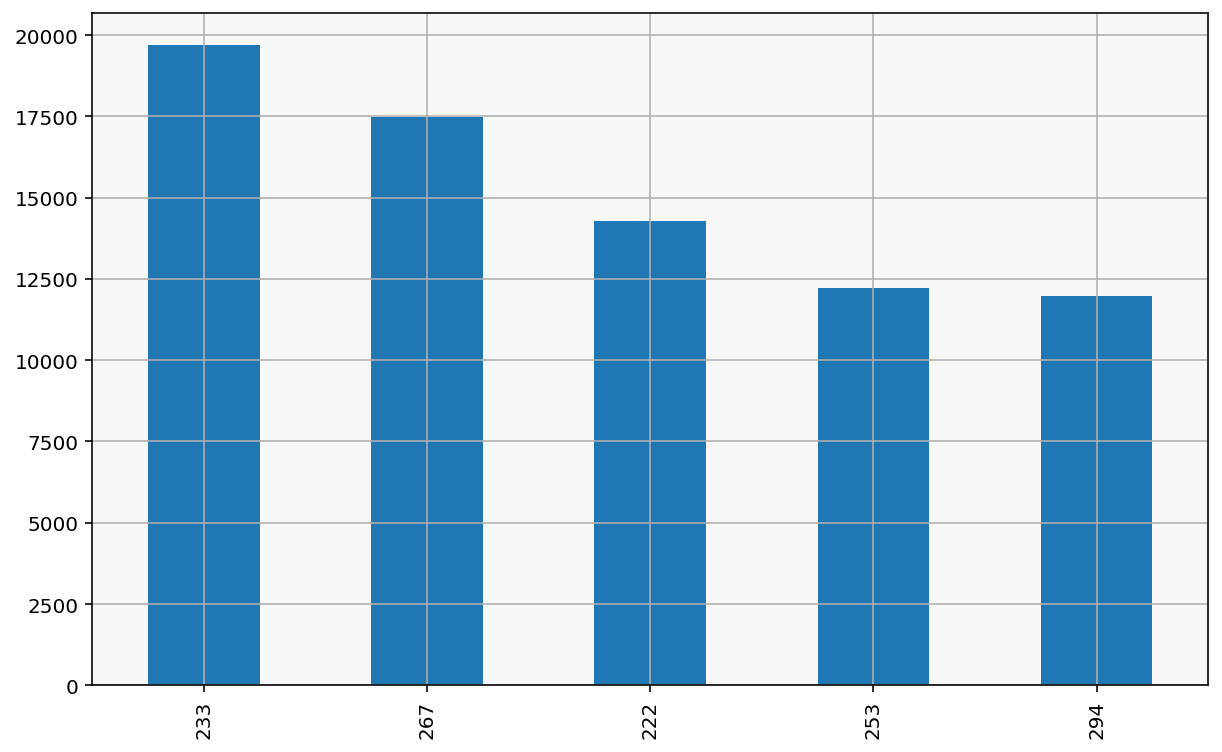

In [37]:
busy_station = merged_bike_stats2['Start station'].value_counts()[:5]
busy_station.plot.bar()

In [38]:
stations.loc[busy_station.index]

,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
233,True,Alexander Kiellands Plass,25,59.928050,10.751203,1.730373
267,True,Bislett Stadion,24,59.925480,10.731318,1.642612
222,True,Olaf Ryes plass,35,59.922414,10.758127,1.271247
253,True,Aker Brygge,36,59.911151,10.729977,0.915139
294,True,Torggata,30,59.915936,10.751573,0.471746


### What is the usage pattern of the busiest station?

Filter out all trips starting from the bussiest station

In [39]:
ak_plass_stats = merged_bike_stats[
    merged_bike_stats["Start station"] == busy_station.index[0]
]
ak_plass_stats.head()

,index,Start station,Start time,End station,End time,in_service,title,number_of_locks,center.latitude,center.longitude,distance_to_oslo_center
39,39,233,2016-09-01 04:11:08+00:00,211,2016-09-01 04:17:26+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
62,62,233,2016-09-01 04:17:29+00:00,247,2016-09-01 04:24:37+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
65,65,233,2016-09-01 04:17:53+00:00,271,2016-09-01 04:22:21+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
85,85,233,2016-09-01 04:22:16+00:00,272,2016-09-01 04:27:51+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373
92,92,233,2016-09-01 04:24:46+00:00,295,2016-09-01 04:32:12+00:00,True,Alexander Kiellands Plass,25.0,59.92805,10.751203,1.730373


Plot the results:

In [40]:
resampled_trips = pd.DataFrame({"Counter": 1}, index=ak_plass_stats["Start time"])
resampled_trips.head()

,Counter
Start time,
2016-09-01 04:11:08+00:00,1
2016-09-01 04:17:29+00:00,1
2016-09-01 04:17:53+00:00,1
2016-09-01 04:22:16+00:00,1
2016-09-01 04:24:46+00:00,1


In [41]:
# resample every 30 minutes and sum results
resampled_trips = resampled_trips.resample("30T").sum()
resampled_trips.head()

,Counter
Start time,
2016-09-01 04:00:00+00:00,6
2016-09-01 04:30:00+00:00,9
2016-09-01 05:00:00+00:00,9
2016-09-01 05:30:00+00:00,26
2016-09-01 06:00:00+00:00,7


<AxesSubplot:xlabel='Start time'>

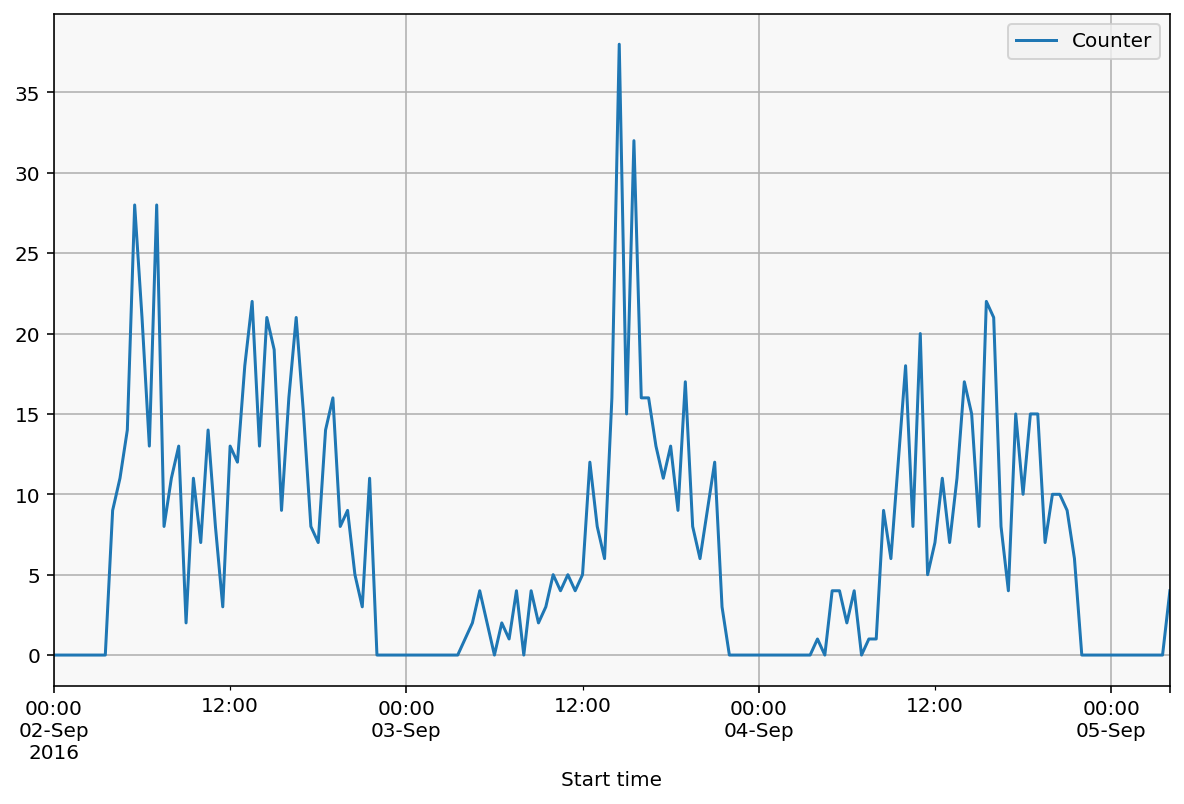

In [42]:
resampled_trips.loc["2016-09-02 00:00:00":"2016-09-05 04:00:00"].plot(y=["Counter"])

In [43]:
pd.to_datetime("2016-09-03").day_name()

'Saturday'